In [1]:
# Import necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import KFold
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


In [2]:
movies = pd.read_csv("Training sheet.csv")

In [3]:
movies_df = pd.DataFrame(movies)
movies_df.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [4]:
movies_df.columns

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [11]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace("/", ""))
        else:
            if isinstance(x, str):
                return str.lower(x.replace(",", ""))
            else:
                return ''

In [12]:
features = ['name', 'display_name', 'creative_type', 'source', 'production_method', 'genre', 'language',
            'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name']
# for feature in features:
#     movies_df[feature] = movies_df[feature].apply(literal_eval)
    
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from math import sqrt
import seaborn as sns

In [14]:
# target = movies_df['Category']
# movies_df = movies_df.drop('Category', axis = 1)
movies_df.keys()

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [15]:
X = movies_df[['creative_type', 'source', 'production_method', 'genre', 'language',
               'board_rating_reason', 'movie_board_rating_display_name']]
y = movies_df["Category"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1196, 7) (1196, 1)


In [16]:
X.head()

,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name
0,science fiction,original screenplay,animationlive action,action,english,"for intense epic battle sequences and warfare,...",pg-13
1,fantasy,based on fiction bookshort story,animationlive action,adventure,english,for some sequences of intense action violence ...,pg-13
2,science fiction,based on tv,animationlive action,action,english,for intense prolonged sequences of sci-fi acti...,pg-13
3,kids fiction,original screenplay,digital animation,adventure,english,general,g
4,fantasy,based on theme park ride,live action,adventure,english,for intense sequences of actionadventure viole...,pg-13


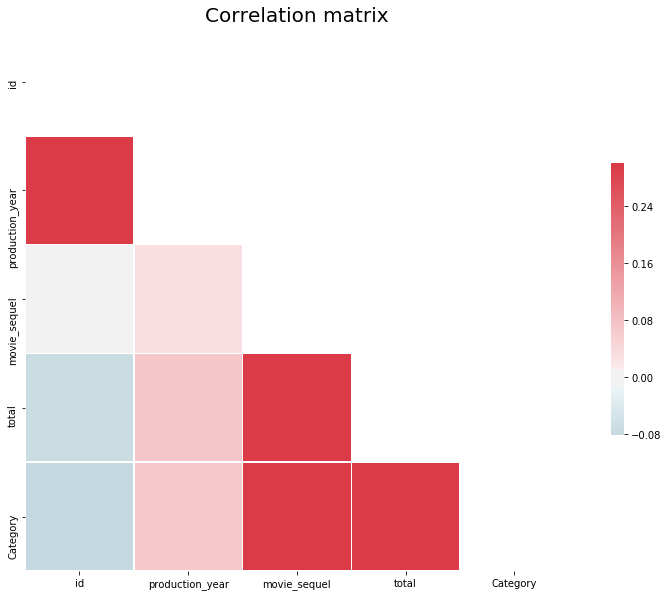

In [17]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = movies_df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

In [18]:
# remove spaces from the 'creative_type', 'source', 'production_method', 'genre', 'language', 'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name'
X.creative_type = X.creative_type.map(lambda x: x.strip())
X.source = X.source.map(lambda x: x.strip())
X.production_method = X.production_method.map(lambda x: x.strip())
X.genre = X.genre.map(lambda x: x.strip())
X.language = X.language.map(lambda x: x.strip())
X.board_rating_reason = X.board_rating_reason.map(lambda x: x.strip())
X.movie_board_rating_display_name = X.movie_board_rating_display_name.map(lambda x: x.strip())

C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
movies_df = movies_df.drop(columns=['id'])

In [20]:
X_2 = pd.get_dummies(data=X)

In [21]:
X_2.head()

,creative_type_contemporary fiction,creative_type_dramatization,creative_type_factual,creative_type_fantasy,creative_type_historical fiction,creative_type_kids fiction,creative_type_multiple creative types,creative_type_science fiction,creative_type_super hero,source_based on comicgraphic novel,...,"board_rating_reason_on appeal for sequences of terror and violence, and some sensuality (originally r)","board_rating_reason_or brief mild thematic elements, language and some crude humor",board_rating_reason_or some violence and sexual content.,board_rating_reason_or thematic elements and language.,movie_board_rating_display_name_g,movie_board_rating_display_name_nc-17,movie_board_rating_display_name_not rated,movie_board_rating_display_name_pg,movie_board_rating_display_name_pg-13,movie_board_rating_display_name_r
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
#Fit the model
y_train = y_train.ravel()
classifier.fit(X_train, y_train)

print(y_train.shape)

(897,)


In [26]:
#Validate Model using test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7603121516164995
Testing Data Score: 0.26755852842809363


In [29]:
# Make predictions with the hypertuned model
predictions = classifier.predict(X_test)

In [30]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=['9', '8', '7', '6', '5', '4', '3', '2', '1']))

             precision    recall  f1-score   support

          9       0.72      0.74      0.73        42
          8       0.64      0.77      0.70        62
          7       0.58      0.70      0.64        61
          6       0.69      0.75      0.72        51
          5       0.77      0.52      0.62        33
          4       0.86      0.30      0.44        20
          3       0.80      0.27      0.40        15
          2       0.36      0.50      0.42        10
          1       0.75      0.60      0.67         5

avg / total       0.68      0.65      0.64       299



Exception: Data must be 1-dimensional